In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


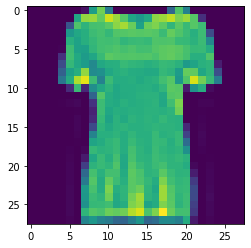

In [21]:
plt.imshow(X_train_full[10]) 
#this is the x variable
#these are the pictures we are going to use to predict the object

In [22]:
#to view the actual category of this object we have to call y train dataset
y_train_full[10]

0

In [18]:
#instead of above thing we can declare names
class_names=["T-shirt/Top", "Trouser" "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [23]:
class_names[y_train_full[10]]

'T-shirt/Top'

In [24]:
#to view the content of data (pixels of eery row of the image)
X_train_full[10]


array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data normalization


In [29]:
#we then normalize the data dimensions so that they are of approximately the same scale
X_train_n=X_train_full/255.
X_test_n=X_test/255.

## split the data into train/validation/test datasets¶

in earlier steps of importing the dataset, we had 60,000 training and 10,000 test datasets. now we further split in test/train/validation
- training data- used for training model
- validation- used for tuning the hyperparameters and evaluate the models
-test data- used to test the model afetr the model has gone through initial vetting by the validation set.¶

In [105]:
# we have divided traiing dataset into further training and validation dataset
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train= y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [106]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Sequential model API

In [107]:
#it gives output same everytime
np.random.seed(42)
tf.random.set_seed(42)

In [108]:
#creating a model object and hidden layers
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [110]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [111]:
weights, biases=model.layers[1].get_weights()

In [112]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [113]:
weights.shape

(784, 200)

In [114]:
biases.shape

(200,)

## compiling the neural network

In [115]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [116]:
model_history = model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid, y_valid))
                 

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7472 - accuracy: 0.7582 - val_loss: 0.5289 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4967 - accuracy: 0.8256 - val_loss: 0.4433 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4503 - accuracy: 0.8416 - val_loss: 0.5356 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4239 - accuracy: 0.8517 - val_loss: 0.4048 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4054 - accuracy: 0.8588 - val_loss: 0.3887 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3869 - accuracy: 0.8648 - val_loss: 0.3827 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8691 - val_loss: 0.3739 - val_accuracy:

In [103]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1688}

In [104]:
model_history.history

{'loss': [0.7492923140525818,
  0.49656233191490173,
  0.44941088557243347,
  0.4235178232192993,
  0.40459808707237244,
  0.38703805208206177,
  0.3743446469306946,
  0.36233314871788025,
  0.35228022933006287,
  0.34147191047668457,
  0.3336672782897949,
  0.3260461986064911,
  0.31818342208862305,
  0.31115153431892395,
  0.30462709069252014,
  0.2984900176525116,
  0.29326608777046204,
  0.28714147210121155,
  0.28192374110221863,
  0.27704665064811707,
  0.272763192653656,
  0.2682304084300995,
  0.2628110647201538,
  0.2590768337249756,
  0.2529456317424774,
  0.25008073449134827,
  0.2461927980184555,
  0.24141527712345123,
  0.23810450732707977,
  0.23434723913669586],
 'accuracy': [0.7592592835426331,
  0.8264814615249634,
  0.8431481719017029,
  0.8520185351371765,
  0.8574444651603699,
  0.8645740747451782,
  0.8674814701080322,
  0.8724814653396606,
  0.8750740885734558,
  0.8798888921737671,
  0.8820370435714722,
  0.883388876914978,
  0.8862037062644958,
  0.8887222409248

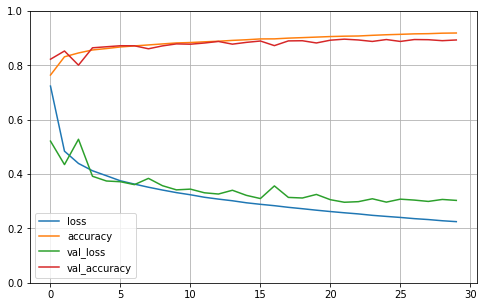

In [69]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluating our model

In [70]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8826


[0.3363315761089325, 0.8826000094413757]

In [71]:
#taking first three samples from dataset n consider it as unseen data
X_new=X_test[:3]

In [74]:
# to predict probability of each class
y_proba=model.predict(X_new)
y_proba.round(2) #to round off the value to two decimal digit

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [83]:
# to predict class itself
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
y_pred

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])

In [85]:
np.array(class_names)[y_pred]

array([['T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top',
        'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top',
        'T-shirt/Top', 'TrouserPullover'],
       ['T-shirt/Top', 'T-shirt/Top', 'TrouserPullover', 'T-shirt/Top',
        'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top',
        'T-shirt/Top', 'T-shirt/Top'],
       ['T-shirt/Top', 'TrouserPullover', 'T-shirt/Top', 'T-shirt/Top',
        'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top', 'T-shirt/Top',
        'T-shirt/Top', 'T-shirt/Top']], dtype='<U15')

AxesImage(54,36;334.8x217.44)


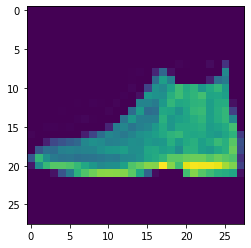

In [86]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


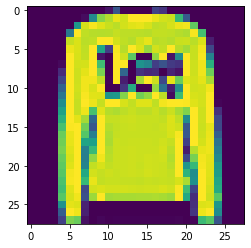

In [90]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


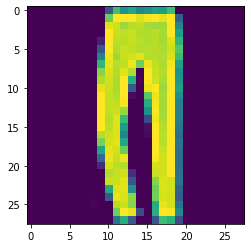

In [88]:
print(plt.imshow(X_test[2]))